In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import time
import joblib
import pickle
import platform
import os
os.chdir('/sfs/qumulo/qhome/bdr6qz/Documents/MSDS/DS6050')
from modeling import train_models
from helper_functions import plot_model_performance, print_importances, create_imp_df

In [2]:
df = pd.read_csv('df_clean.csv')
labels = df.pop("mvp_share")
df_selected = pd.read_csv('df_selected.csv')
feature_names = list(df_selected.columns)

In [3]:
start_time = time.time()

trained_models, results, best_model_name, best_model = train_models(df_selected,
                                                                    df,
                                                                    labels,
                                                                    feature_names,
                                                                    label_col_name="mvp_share")

end_time = time.time()
execution_time = end_time - start_time
print(f"Model building execution time: {round(execution_time/60, 2)} minutes")

/home/bdr6qz/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 10, None, 1, 2, 500] before, using random point [False, 7, None, 5, 7, 160]
  warnings.warn(


Model building execution time: 3.75 minutes


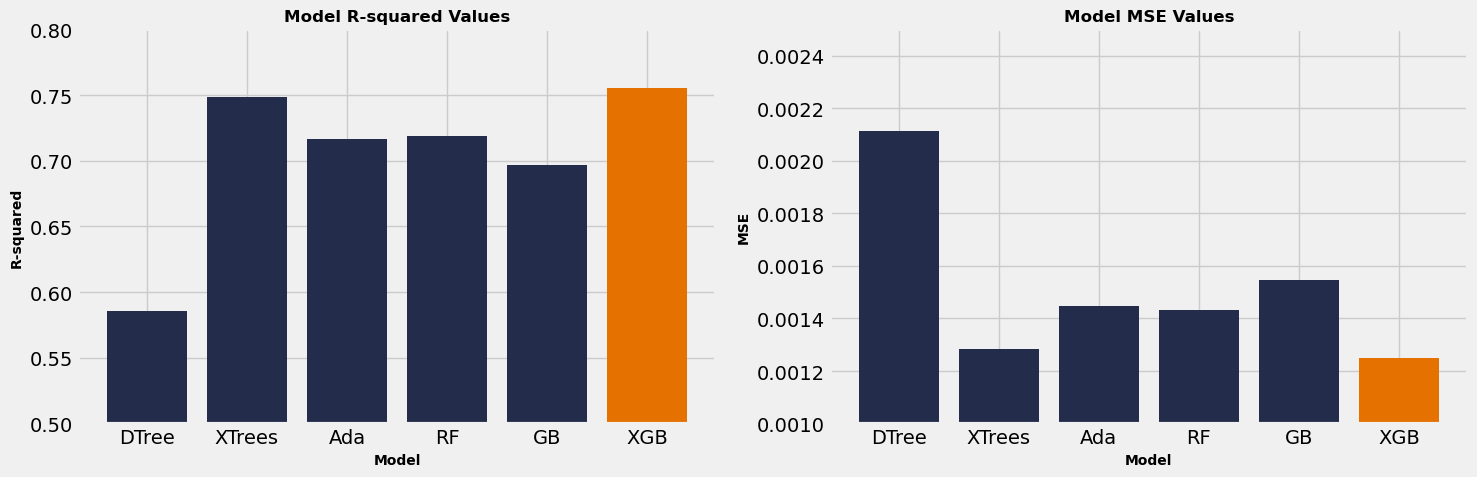

In [4]:
# Extract the model names, R-squared values, and MSE values from the results
model_names = list(results.keys())
r_sqs = [result["R-squared"] for result in results.values()]
MSE_s = [result["MSE"] for result in results.values()]

# Call the plotting function
plot_model_performance(model_names, r_sqs, MSE_s)

In [5]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [6]:
print_importances(feature_names, best_model)

Feature Importances:
1: WS : 0.44625
2: VORP : 0.20354
3: PER : 0.15852
4: Rk_Year : 0.07196
5: PTS : 0.03045
6: MP : 0.02963
7: eFG% : 0.01709
8: WS/48 : 0.01549
9: DBPM : 0.01548
10: AST : 0.01159
